In [2]:
import gc
import os
import time
import pandas as pd

# 1. set file path & political dict
ref: https://github.com/crownpku/Awesome-Chinese-NLP

In [3]:
path = r'/Users/zoe/Desktop/ptt_crawler//'
os.listdir(path)

['Gossiping-1-5.json',
 'Gossiping-39361-39363_reply_20191228_191753.csv',
 'ntusd-negative.txt',
 'ptt_id_check.ipynb',
 'Gossiping-28800-29600_reply_20191229_192300.csv',
 '.DS_Store',
 'Gossiping-28800-29600.json',
 'ptt_excel.xlsx',
 'Gossiping-28800-29600_article_20191229_192300.csv',
 'Gossiping-1-5_article_20191228_201931.csv',
 'Gossiping-1-5_article_20191228_191753.csv',
 'local_script',
 'neo4j_community_pagerank_1204-20191211T114233Z-001.zip',
 'python -m PttWebCrawler -b PublicServan -i 100 200',
 'Gossiping-39361-39363.json',
 'test.json',
 'Gossiping-37500-39075.json',
 'ntusd-positive.txt',
 'neo4j_community_pagerank_1204',
 'Gossiping-39361-39363_article_20191228_191753.csv',
 '.ipynb_checkpoints',
 'Gossiping-37700-39294_1207.json',
 'test2.json',
 'Gossiping-1-5_reply_20191228_201931.csv',
 'Gossiping-1-5_reply_20191228_191753.csv',
 'HatePolitics-2600-4035.json']

In [4]:
party_dict = {
      'deep_dpp_kw' : ['賴清德', '台獨', '基進側翼', '阿扁', '陳水扁']
    , 'light_dpp_kw' : ['民進黨', '林佳龍']
    , 'tsai_kw' : ['蔡英文', '蔡總統', '小英']
    , 'han_kw' : ['韓國瑜', '韓導', '韓國魚', '國瑜']
    , 'light_kmt_kw' : ['國民黨', '吳敦義', '馬英九']
    , 'deep_kmt_kw' : ['兩岸統一', '和平協議']
    , 'third_party_kw' : ['柯文哲', '郭董', '郭台銘', '柯粉', '民眾黨', '時代力量', '黃國昌', '吳崢', '柯P', '李登輝']
    , 'unrelated_kw' : ['親民黨', '宋楚瑜']
    , 'hk_protest' : ['反送中', '逃犯條例', '連儂牆', '真普選']
    , 'china_spy' : ['共諜案', '王立強', '向心']
}

filter_lst = ['com', 'imgur', 'https' , 'www', '新聞', '討論']

# 2. politics check
## notes:
#### 1. trans dict to config file
#### 2. build political dict from frequent words of article title & filter stop words
#### 3. reference https://github.com/sweslo17/chinese_sentiment/blob/master/dict/user_dic.dic
#### 4. others: open source political dict, wikipedia
#### 5. 中文詞庫 https://scidm.nchc.org.tw/dataset/nchc_2019_te_04
#### 6.  政治網路口碑的情感分析：語意關連性之觀點 http://csw.shu.edu.tw/File/Download/edmitems/%E5%82%B3%E6%92%AD%E7%A0%94%E7%A9%B6%E8%88%87%E5%AF%A6%E8%B8%908(2)-03%20%E9%99%B6%E6%8C%AF%E8%B6%85.pdf

[None, None, None, None, None, None, None, None, None, None]

In [15]:
for x in os.listdir(path):
    if 'article' in  x:
        print(x)
        #df = pd.read_csv(path + x)
        #break

Gossiping-28800-29600_article_20191229_192300.csv
Gossiping-1-5_article_20191228_201931.csv
Gossiping-1-5_article_20191228_191753.csv
Gossiping-37700-39294_1207_article_20191229_192300.csv
Gossiping-39361-39363_article_20191228_191753.csv


In [16]:
df = pd.read_csv(path + 'Gossiping-37700-39294_1207_article_20191229_192300.csv')

In [31]:
def article_pol_tendency_check(art_df, party_dict):
    pol_list = []
    [ pol_list.extend(x) for x in party_dict.values()]
    
    art_df.loc[art_df.article_title.isna(), 'article_title'] = 'NoData'
    art_df.loc[art_df.content.isna(), 'content'] = 'NoData'
    art_df['corpus'] = art_df.article_title + ' ' + art_df.content
    art_df['pol_word_cnt'] = art_df.corpus.str.count('|'.join(pol_list))

    art_df['party'] = 'undef'

    for slc_kw in party_dict: 
        rs_lst = []
        #slc_kw = 'tsai_kw'
        in_lst = party_dict[slc_kw]
        print(in_lst)
        ex_lst = []

        [ex_lst.extend(party_dict[x]) for x in party_dict if x != slc_kw]
        #因Re文會引述原文，為了確保分析的準確性，先排除這些文章
        for row in art_df.itertuples():
            temp_corpus = row.corpus
            #temp_corpus = row.title
            if any(kw in temp_corpus for kw in in_lst)\
            and not any(kw in temp_corpus for kw in ex_lst)\
            and row.re_flag == 'N':
                art_df.loc[row.Index, 'party'] = slc_kw
    return art_df

In [32]:
temp_df = article_pol_tendency_check(df, party_dict)

['賴清德', '台獨', '基進側翼', '阿扁', '陳水扁']
['民進黨', '林佳龍']
['蔡英文', '蔡總統', '小英']
['韓國瑜', '韓導', '韓國魚', '國瑜']
['國民黨', '吳敦義', '馬英九']
['兩岸統一', '和平協議']
['柯文哲', '郭董', '郭台銘', '柯粉', '民眾黨', '時代力量', '黃國昌', '吳崢', '柯P', '李登輝']
['親民黨', '宋楚瑜']
['反送中', '逃犯條例', '連儂牆', '真普選']
['共諜案', '王立強', '向心']


In [0]:
#pol_df = art_df[art_df.pol_word_cnt > 0].copy()

#### check senti 
### personal political spectrum check
### for accuracy we set senti in colab with CKIP & GPU acceleration, but for testing, you can just use string count or jieba with tradional繁體 dict + sentiment dict + politcal dict 

In [0]:
# dpp_kw = ['民進黨', '蔡英文', '蔡總統', '賴清德', '小英']
# kmt_kw = ['國民黨', '韓國瑜', '韓導', '馬英九', '韓國魚']
# unrelated_kw = ['親民黨', '宋楚瑜', '柯文哲', '基進側翼', '郭董', '郭台銘', '柯粉', '民眾黨', '時代力量']

# rs_lst = []

# for row in hate_df_t2.itertuples():
#     #just avoid none
#     temp_corpus = str(row.article_title) + ' ' + row.content
#     if any(kw in temp_corpus for kw in dpp_kw) and\
#        not any(kw in temp_corpus for kw in kmt_kw) and\
#        not any(kw in temp_corpus for kw in unrelated_kw)and\
#        row.re_flag is False:
#         rs_lst.append(temp_corpus)
#         print(temp_corpus)
#         #break

# reply
# seperate re and non-re
## 1. check intensive interaction & reply cnt above avg/median by it's distribution


In [0]:
reply_df = []

for x in pol_df.itertuples():
    
    if x.Index % 10000 == 1:
        print(x.Index)
        
    tmp_reply = pd.DataFrame(x.messages)
    #push_ip_ = reply.push_ipdatetime.str.split(' ', n=1, expand=True)

    tmp_reply['target'] = x.author
    tmp_ip_dt = tmp_reply.push_ipdatetime.copy()
    
    tmp_reply['reply_datetime'] = str(x.date.year) + '/' + np.where(tmp_ip_dt.str.len() < 20, tmp_ip_dt, tmp_ip_dt.str[-11:])
    ##以發文日期作為推文的估計值，因為push_ipdatetime的ip 跟 datetime放在一起，有些只有datetime 沒有ip，好像跟RE 有關....
    ##欄位重新命名，push_userid 改為 source
    tmp_reply.rename({'push_userid':'source'}, axis=1, inplace=True)
    tmp_reply['article_id'] = x.article_id
    reply_df.append(tmp_reply)

In [0]:
reply_df = pd.concat(reply_df)

In [0]:
reply_df.reply_datetime = pd.to_datetime(reply_df.reply_datetime, format='%Y/%m/%d %H:%M', errors='coerce')
reply_df['ip'] = np.where(reply_df.push_ipdatetime.str.len() > 20, reply_df.push_ipdatetime.str[:-12], None)

In [0]:
reply_df.push_tag.replace({'推':'push', '噓':'boo', '→':'neutral'}, inplace=True)

In [0]:
reply_df.head()

,push_content,push_ipdatetime,push_tag,source,target,reply_datetime,article_id,ip
0,http://i.imgur.com/bXC5X0l.jpg,112.104.64.169 09/26 08:51,neutral,silent328kn,t21,2019-09-26 08:51:00,M.1569459046.A.F55,112.104.64.169
1,沒有黨證 不是鴿子 悲劇,223.137.80.189 09/26 08:53,push,jason91818,t21,2019-09-26 08:53:00,M.1569459046.A.F55,223.137.80.189
0,推 柯糞吃屎,42.77.41.202 09/26 08:52,push,MoWilliams,hugh509),2019-09-26 08:52:00,M.1569459079.A.990,42.77.41.202
1,總統府一再說謊 一開始說沒有政務人員涉入,61.220.51.98 09/26 08:52,boo,deann,hugh509),2019-09-26 08:52:00,M.1569459079.A.990,61.220.51.98
2,台灣價值+1000,220.134.239.173 09/26 08:52,push,kevin751231,hugh509),2019-09-26 08:52:00,M.1569459079.A.990,220.134.239.173


In [0]:
reply_df['reply_date'] = reply_df.reply_datetime.astype(str).str[:10]
reply_df['reply_mn'] = reply_df.reply_datetime.astype(str).str[:7]

In [0]:
repl_dict = {'\)':'', '\(':''}
reply_df.target.replace(repl_dict, regex=True, inplace=True)
#hugh509)

In [0]:
reply_df.groupby('target', as_index=False).agg({'ip':'count'}).sort_values('ip', ascending=False)[1:50]

,target,ip
4231,zxcelephant,18168
2328,johnny790218,13676
2221,ivorysoap,13254
3707,sunyeah,13080
874,Wojnarowski,12618
1247,beerduck,12106
3737,taipeixcity,11689
3717,sweat992001,11340
802,TTDEarl,10541
2656,live1002,10377


In [0]:
reply_df.replace(',', '，', inplace=True, regex=True)

In [0]:
reply_df[reply_df.push_content.str.contains(',')]

,push_content,push_ipdatetime,push_tag,source,target,reply_datetime,article_id,ip,reply_date,reply_mn


In [0]:
reply_df.to_csv(path + 'gossi_pol.csv')

In [0]:
reply_aggr_df = reply_df.groupby(['push_tag', 'source', 'target', 'reply_date']).count()['reply_mn']
reply_aggr_df = pd.DataFrame(reply_aggr_df).reset_index()
reply_aggr_df.columns = ['push_tag', 'source', 'target', 'reply_date', 'cnt']

In [0]:
reply_df_sum = reply_aggr_df.groupby(['source', 'target', 'push_tag'], as_index=False).sum()

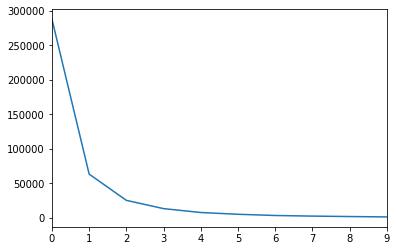

In [0]:
#check massive coordinate influence operation (CIO)
#avg, median, box plot, log (poison to normal)
#[reply_df_sum.push_tag == 'push']

reply_df_sum.groupby('cnt', as_index=False).count()['source'][:10].plot()

In [0]:
#reply_df_sum[reply_df_sum.push_tag == 'boo'].cnt.mean()
#reply_df_sum[reply_df_sum.push_tag == 'push'].cnt.mean()
reply_df_sum[reply_df_sum.push_tag == 'neutral'].cnt.mean()

3.22767691307578

In [0]:
reply_df_sum[reply_df_sum.cnt == 1]

,source,target,push_tag,cnt
0,A0091127,alberchi,push,1
1,A0091127,purplvampire,push,1
2,A0091127,rocklorl,boo,1
3,A0908,butten986,push,1
4,A0936104638,generally,boo,1
...,...,...,...,...
423449,zzzzzzzzzzzy,czqs2000,boo,1
423450,zzzzzzzzzzzy,czqs2000,neutral,1
423451,zzzzzzzzzzzy,diefishfish,push,1
423452,zzzzzzzzzzzy,eagleofsouth,neutral,1


# Reply distri (the fans of someone(KOL))
# filter self reply

In [0]:
reply_df_sum = reply_df_sum[reply_df_sum.source != reply_df_sum.target]

In [0]:
fil_cond = reply_df_sum.cnt > 2

reply_df_sum_pct = reply_df_sum[fil_cond].groupby(['source', 'push_tag', 'target']\
                   ).agg({'cnt':'sum'}).groupby(level=[0, 1]).apply(lambda x:100*x/float(x.sum()))

In [0]:
reply_df_sum_pct

cnt
source       push_tag target               
******       neutral  hw102050   100.000000
************ neutral  hw102050   100.000000
             push     hw102050   100.000000
A0091127     neutral  cosmite     23.529412
                      hoyumi      17.647059
...                                     ...
zzzzz14z14z  neutral  Whitening   50.000000
                      kid725      50.000000
             push     joanzkow    46.153846
                      rayGG       30.769231
                      todao       23.076923

[155153 rows x 1 columns]

In [0]:
reply_df_sum_pct = reply_df_sum_pct.reset_index()

In [0]:
reply_df_sum[reply_df_sum.target == 'jobli'].sort_values('cnt', ascending=False)[:20]

,source,target,push_tag,cnt


In [0]:
reply_df_sum[reply_df_sum.source == 'yisdl'].sort_values('cnt', ascending=False)[:20]

In [0]:
#duped by aggr!
reply_df_sum_fn = reply_df_sum_pct.merge(reply_df_sum, how='left', on=['source', 'target', 'push_tag'])

In [0]:
top_n_kol = author_attr.sort_values('push', ascending=False)[:].Id

cond1 = reply_df_sum_fn.cnt_x > 70
cond2 = reply_df_sum_fn.cnt_y > 30
cond3 = reply_df_sum.target.isin(top_n_kol)

temp_rnk = reply_df_sum_fn[ cond1 & cond2 & cond3].sort_values('target')
#temp_rnk[temp_rnk.target.isin(known_id)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [0]:
temp_rnk[temp_rnk.push_tag != 'neutral'].sort_values('cnt_y', ascending=False)[:20]

,source,push_tag,target,cnt_x,cnt_y
144182,w09351500,push,yangyunjie,83.954155,293
27993,YU0121,push,Bignana,97.260274,213
12165,Ironstick,boo,Bignana,90.666667,136
23371,Skydier,boo,Bignana,88.741722,134
62890,fantasibear,boo,Bignana,100.000000,111
22412,SP500,boo,doraBBO,97.115385,101
6531,Dumbbbb,boo,johnson20524,100.000000,93
42276,brianlee15,boo,gentleman888,100.000000,90
52834,dan5120,boo,Bignana,89.795918,88
87322,kawhi5566,boo,doraBBO,100.000000,88


In [0]:
reply_df_sum[reply_df_sum.source == 'w09351500'].sort_values('cnt', ascending=False)

,source,target,push_tag,cnt
2153647,w09351500,yangyunjie,push,293
2153640,w09351500,ptt80357,boo,86
2153643,w09351500,wade0130,push,56
2153629,w09351500,askingts,boo,23
2153626,w09351500,CTC0115,boo,5
2153646,w09351500,yangyunjie,neutral,5
2153634,w09351500,excell,boo,5
2153631,w09351500,br06,boo,4
2153633,w09351500,cycling,boo,4
2153635,w09351500,kenjohn,boo,4


# try inverse: Volume distribution

In [0]:
fil_cond = reply_df_sum.cnt > 2

reply_df_sum_pct_inv = reply_df_sum[fil_cond].groupby(['target', 'push_tag', 'source']\
                   ).agg({'cnt':'sum'}).groupby(level=[0, 1]).apply(lambda x:100*x/float(x.sum()))

In [0]:
reply_df_sum_pct_inv = reply_df_sum_pct_inv.reset_index()

In [0]:
reply_df_sum_fn_inv = reply_df_sum_pct_inv.merge(reply_df_sum, how='left', on=['source', 'target', 'push_tag'])

In [0]:
reply_df_sum_fn_inv.head()

,target,push_tag,source,cnt_x,cnt_y
0,,boo,ElizabethXIV,13.513514,5
1,,boo,cowardlyman,13.513514,5
2,,boo,evildewk,10.810811,4
3,,boo,fragment1000,27.027027,10
4,,boo,frtwwilo,8.108108,3


In [0]:
top_n_kol = author_attr.sort_values('push', ascending=False)[:].Id

#threshold is 70%
cond1 = reply_df_sum_fn_inv.cnt_x > 10
cond2 = reply_df_sum_fn_inv.cnt_y > 30
cond3 = reply_df_sum_fn_inv.target.isin(top_n_kol)

temp_rnk = reply_df_sum_fn_inv[ cond1 & cond2 & cond3].sort_values('cnt_y', ascending=False)

In [0]:
temp_rnk[temp_rnk.push_tag == 'push'][:20]

,target,push_tag,source,cnt_x,cnt_y
148880,yangyunjie,push,w09351500,98.986486,293
48355,c77110901,push,a382773,68.766404,262
150073,younglol,push,a382773,65.048544,134
142975,wade0130,push,yangyunjie,51.250000,123
24822,SC5566,push,yangyunjie,100.000000,85
144125,wen9008,push,fcuk9981,35.443038,84
73330,haudai,push,leo8064047,46.428571,78
73327,haudai,push,galilei503,46.428571,78
12685,Induction,push,Bignana,44.067797,78
66271,fr346342,push,SC5566,100.000000,77


In [0]:
#author_attr.sort_values('push', ascending=False)[:100]

In [0]:
reply_df_sum[reply_df_sum.target == 'c77110901'].sort_values('cnt', ascending=False)
#y30048

,source,target,push_tag,cnt
435926,a382773,c77110901,push,262
2279872,younglol,c77110901,push,74
1156784,ilovetaylor,c77110901,push,31
504850,alog,c77110901,neutral,23
788003,danieloo,c77110901,neutral,21
...,...,...,...,...
865414,eatingshit,c77110901,boo,1
871936,edwardtp,c77110901,neutral,1
873352,eemail,c77110901,neutral,1
877745,eko112,c77110901,neutral,1


In [0]:
known_id

https://pttpedia.fandom.com/zh/wiki/Gossiping%E6%9D%BF_(%E5%85%AB%E5%8D%A6%E6%9D%BF)
現任板主
RS5566/Bignana/RedMango/arsonlolita

SyntaxError: ignored

In [0]:
#it seems would be a wrong convert, because each relation could only get last record without weight sum
#G = nx.from_pandas_edgelist(reply_df, source='source', target='target', create_using=nx.DiGraph())

# statistics

In [0]:
hate_df_t2

,article_id,article_title,author,board,content,date,ip,messages,all,boo,count,neutral,push,re_flag
0,M.1571141315.A.A38,[新聞] 台灣民眾黨第二波提名 移民署專員陳允萍,batt0909,HatePolitics,1.新聞網址 https://tinyurl.com/y59nj5jl 2.新聞來源 聯合 ...,2019-10-15 20:08:31,118.171.54.225,"[{'push_content': '不是台東人 不過 聽過他的事蹟 很棒', 'push_...",11,0,9,2,9,False
0,M.1565594449.A.3F0,,,HatePolitics,作者: kero2377 (賤畜福利熊) 看板: HatePolitics 標題: [討論]...,NaT,123.194.10.195,"[{'push_content': '我只看見郭台銘蓄勢以待', 'push_ipdatet...",189,11,64,103,75,False
0,M.1570175294.A.C5E,[公告] 政治黑特板板規_20191004_V5.4,mark2165,HatePolitics,第一章 總則 1.本板接受中華民國政府頒布之法律，教育部學術網路公約，以及PTT站方制定之站...,2019-10-04 15:48:12,111.242.230.238,"[{'push_content': '修了什麼也講一下吧', 'push_ipdatetim...",5,0,2,3,2,False
0,M.1570254569.A.D42,[討論] 政黑投票結果整理,kero2377,HatePolitics,總統你錯了投票結果 投票結果:(共有 228 人投票每人最多可投 5 票) 選 項 政治鬥爭...,2019-10-05 13:49:26,123.194.10.195,"[{'push_content': '厚氣氣氣', 'push_ipdatetime': '...",27,4,8,11,12,False
0,M.1570332617.A.90A,[公告] 2020選戰大預測活動開跑!!!!!!!!!!!,kero2377,HatePolitics,2020選戰預測大活動正式開跑 2020大選將至 各家版友的預測文也如雨後春筍般紛紛出爐 所...,2019-10-06 11:30:15,123.194.10.195,"[{'push_content': '推', 'push_ipdatetime': '110...",30,6,5,13,11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,M.1571143570.A.242,[討論] 韓國瑜再撐10天就換不掉了,RichWomen,HatePolitics,很清楚麻 不到一個月 韓國瑜就要去中選會登記 現在就是韓國瑜不被換的危急存亡之秋 不換不換不...,2019-10-15 20:46:08,36.224.44.144,"[{'push_content': '笑 韓國瑜是初選大勝的最強打者', 'push_ipd...",53,2,15,34,17,False
0,M.1571143609.A.8FF,Re: [黑特] 台灣社運圈的悲哀與裂痕,ak47good,HatePolitics,: 引述《radiohead56 (L o S e r f a t n e r D)》之銘言...,2019-10-15 20:46:43,61.228.233.77,"[{'push_content': '多標吃屎柯糞算嗎? 到處貼特別噁心', 'push_i...",1,0,1,0,1,True
0,M.1571144004.A.3CD,[新聞] 柯文哲稱時代力量被消化 林濁水打臉狠批,bankingpaul,HatePolitics,媒體：自由 柯文哲稱時代力量被消化 林濁水打臉狠批：龜笑鱉無尾 http://news.lt...,2019-10-15 20:53:22,110.50.159.50,"[{'push_content': '那裡狠？', 'push_ipdatetime': '...",8,0,4,4,4,False
0,M.1571144083.A.90A,[新聞] 雙北申辦亞運 侯友宜：中央地方合作才辦,weni302,HatePolitics,1.新聞網址 https://www.cna.com.tw/news/aspt/201910...,2019-10-15 20:54:41,180.217.141.158,"[{'push_content': '卡韓', 'push_ipdatetime': '22...",9,1,3,4,4,False


features:
ptt profiling (source
1. create time

behavior
1. centralization (networking & statistics (distribution)

協同性資訊操弄/群控引流  
cib? 
Collaborative Information Behaviour (CIB)
collaborative inauthentic behavior
cio coordinate influence operatoin
cib coordinate inauthentic behavior


# frequency calculation

In [0]:
training_corpus = hate_df_t2.article_title + ' ' + hate_df_t2.content
training_corpus.reset_index(drop=True, inplace=True)
training_corpus = training_corpus[training_corpus.notna()]

In [0]:
training_corpus = training_corpus[training_corpus.notna()]

In [0]:
training_corpus[0]

'[討論] 吳釗燮到底是什麼來頭 怎麼這麼大咖？ 經歷：中華民國總統府秘書長、中華民國總統府副秘書長、國家安全會議秘書長 民主進步黨秘書長、行政院大陸委員會主任委員、駐美代表 還在推特大嗆中國官媒 堪稱中華民國史上最硬外交部長 吳澧培是美國銀行家 兒子吳迪在美國的台灣人公共事務會工作 可見得跟美國有特殊關係'

#try Tensorflow 2.0 of word2vec

In [0]:
embedding_layer = layers.Embedding(1000, 5)

In [0]:
tf.constant([4,5,6])

<tf.Tensor: id=41, shape=(3,), dtype=int32, numpy=array([4, 5, 6], dtype=int32)>

In [0]:
result = embedding_layer(tf.constant([4,5,6]))
result.shape

TensorShape([3, 5])

In [0]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,6]]))
result.shape

TensorShape([2, 3, 5])

#try ckip

In [0]:
data_utils.download_data_gdown("./")
#CUDA_VISIBLE_DEVICES environment variable, e.g. 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#disable_cuda=False, e.g. ws = WS("./data", disable_cuda=False)

ws = WS("./data", disable_cuda=False)
pos = POS("./data", disable_cuda=False)
ner = NER("./data", disable_cuda=False)

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
1.88GB [00:32, 58.5MB/s]


In [0]:
gc.collect()

0

In [0]:
ws_lst = ws(training_corpus[:100])
#100 about 10s

In [0]:
#ws_lst[1]
pos_sentence_list = pos(ws_lst)

In [0]:
entity_sentence_list = ner(ws_lst, pos_sentence_list)

In [0]:
tt = []
[ tt.extend(x) for x in pos_sentence_list]
tt = pd.DataFrame(tt)
tt['temp'] = 1
tt.groupby([0], as_index=False).count().sort_values('temp', ascending=False)

In [0]:
for art_word, art_pos in zip(ws_lst, pos_sentence_list):
    for words, pos_pieces in zip(art_word, art_pos):
        print(words, pos_pieces)
    break

In [0]:
w_lst = []
for ner_lst in entity_sentence_list:
    for word in ner_lst:
        if word[2] == 'PERSON':
            #print(word)
            w_lst.append(word[3])
    #break

In [0]:
#tt = pd.DataFrame(ws_lst)
tt = pd.DataFrame(w_lst)
tt['temp'] = 1
tt.groupby([0], as_index=False).count().sort_values('temp', ascending=False)[:20]

In [0]:
#ws_lst

#ws_lst[0]
#[  y for y  for x in ws_lst][0]


tt = []

[ tt.extend(x) for x in ws_lst]

tt = pd.DataFrame(tt)
#tt
#tt = pd.DataFrame(w_lst)
tt['temp'] = 1
#tt
tt = tt.groupby([0], as_index=False).count().sort_values('temp', ascending=False)


for x in tt.itertuples():
    print(x)

In [0]:
#reindex frist??
#art_df_2.reset_index(drop=True, inplace=True)
#art_df_2['content'] = training_corpus[training_corpus.notna()]
#art_df_2 = art_df_2[art_df_2.content.notna()]

In [0]:
#self define dict for politicals~~~
#other source: wiki, articut, ckip... extract from 輸入法???

In [0]:
#testing not including seld def dict before

test_str = '柯P真好玩'
[ x for x in jieba.cut(test_str)]

tt = jieba.cut(test_str)
tt.throw()
#jieba.add

In [0]:
def chinese_word_cut(input_corpus):
    
    return " ".join(jieba.cut(input_corpus))#分词

In [0]:
rs_lst_seg = []

for x in rs_lst:
   rs_lst_seg.append([y for y in jieba.cut(x)])
   #break

In [0]:
foo = []

for _ in rs_lst_seg:
    foo.extend(_)

foo = pd.DataFrame(foo, columns=['word'])
foo['cnt'] = 1
foo.groupby('word', as_index=False).sum().sort_values('cnt', ascending=False)[:30]

In [0]:
foo

In [0]:
training_corpus

In [0]:
cond_re = hate_df_t2.re_flag == False
cond_cont_dpp = hate_df_t2.content.str.contains(['民進黨', '蔡英文'])

hate_df_t2[cond_re & cond_cont_dpp]

#training_corpus = hate_df_t2.article_title + ' ' + hate_df_t2.content
#training_corpus.reset_index(drop=True, inplace=True)
#training_corpus = training_corpus[training_corpus.notna()]

In [0]:
#art_df_2_bk = art_df_2.copy()
#art_df_2 = art_df_2_bk.copy()

In [0]:
#art_df_2.date = pd.to_datetime(art_df_2.date, errors='coerce')

In [0]:
#art_df_2[art_df_2.date.isna()].shape

In [0]:
#print(art_df_2[art_df_2.date !=''].date.min())
#print(art_df_2[art_df_2.date !=''].date.max())
#叫你爸媽負責好了  爽不爽                    42.74.19.119 06/18 20:44

In [0]:
training_corpus = training_corpus[training_corpus.notna()]

In [0]:
trim_corpus = training_corpus.apply(chinese_word_cut)
#art_df_2["content_cutted"] = art_df_2.content.apply(chinese_word_cut)

In [0]:
trim_corpus.head()

0    [ 討論 ]   吳釗燮 到底 是 什麼 來頭   怎麼 這麼 大 咖 ？   經歷 ： 中...
1    Fw :   [ 新聞 ]   寶可夢 世界 大賽 冠 軍   高雄 10 月 觀光 代言人...
2    [ 討論 ]   有 一種 人   有 一種 人 ，   這種 人 在 各種 族群 中 都 ...
3    [ 黑特 ]   如果 明天 風雨 很大 ...... 不 知道 雙北市 長   侯友宜 今...
4    Re :   [ 討論 ]   香港 當地 的 民眾 怎麼 看待 暴動 ？   :   好奇...
dtype: object

In [0]:
trim_test = []

for x in rs_lst_seg:
    trim_test.append(' '.join(x))

In [0]:
trim_test

In [0]:
# try the api of gensim plugin?
# try mutiple processing
#https://speakerdeck.com/fukuball/head-first-chinese-text-segmentation?slide=64
#https://radimrehurek.com/gensim/models/ldamulticore.html

# https://zhuanlan.zhihu.com/p/30925299
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
# https://github.com/bmabey/pyLDAvis/tree/master/pyLDAvis
# https://medium.com/pyladies-taiwan/%E4%BB%A5-jieba-%E8%88%87-gensim-%E6%8E%A2%E7%B4%A2%E6%96%87%E6%9C%AC%E4%B8%BB%E9%A1%8C-%E4%BA%94%E6%9C%88%E5%A4%A9%E4%BA%BA%E7%94%9F%E7%84%A1%E9%99%90%E5%85%AC%E5%8F%B8%E6%AD%8C%E8%A9%9E%E5%88%86%E6%9E%90-ii-fdf5d3708662

In [0]:
#max_features : int or None, default=None
#If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

#This parameter is ignored if vocabulary is not None.

#max_df : float in range [0.0, 1.0] or int, default=1.0
#When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). 

In [0]:
filter_lst = ['com'
, 'imgur'
, 'https'
, 'www'
, '新聞'
, '討論'
, 'sent'
, 'from'
, 'my'
, '就是'
, '真的'
, '什麼'
, '可以'
, '不是'
, '自己'
, '知道'
, '所以'
, '如果'
, '還是'
, '這樣'
]

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

n_features = 1000

tf_vectorizer = CountVectorizer(strip_accents='unicode'
                              , max_features=n_features
                              , stop_words=filter_lst
                              , max_df=1.0
                              , min_df=0.1)#训练词矩阵
tf = tf_vectorizer.fit_transform(trim_test)
#tf = tf_vectorizer.fit_transform(trim_corpus)

In [0]:
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode'
                                   , max_df=0.95
                                   , min_df=2
                                   , max_features=n_features
                                   , stop_words=filter_lst)
t0 = time.time()
tfidf = tfidf_vectorizer.fit_transform(trim_test)
print("done in %0.3fs." % (time.time() - t0))

done in 0.439s.


#get freq

In [0]:
#tf.toarray.sum(axis=0)
freq_df = pd.DataFrame([tf_vectorizer.get_feature_names(), tf.toarray().sum(axis=0)]).T
freq_df.columns = ['word', 'cnt']

freq_tfidf_df = pd.DataFrame([tfidf_vectorizer.get_feature_names(), tfidf.toarray().sum(axis=0)]).T
freq_tfidf_df.columns = ['word', 'cnt']

In [0]:
freq_df.sort_values('cnt', ascending=False)[:20]
#pd.DataFrame.plot()

,word,cnt
59,蔡英文,2462
22,台灣,2107
47,民進黨,1887
57,總統,1023
30,就是,820
54,立委,723
70,香港,690
20,可以,683
41,政府,676
13,什麼,605


In [0]:
freq_tfidf_df.sort_values('cnt', ascending=False)[:100].word.tolist()

#get kw

In [0]:
test_kw_sent = ' '.join(trim_corpus[-2000:])
jieba.analyse.extract_tags(test_kw_sent)

In [0]:
#len(test_kw_sent)
#test_kw_sent[:30]
#jieba.analyse.TextRank

#computensive......
#jieba.analyse.textrank(test_kw_sent)

KeyboardInterrupt: ignored

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

#Latent Dirichlet Allocation with online variational Bayes algorithm
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=30, 
                  learning_method='online', learning_offset=20.0,)#LDA模型训练

#random_state=0 should check random state??

In [0]:
#training step
lda.fit(tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=20.0,
                          max_doc_update_iter=100, max_iter=30,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [0]:
#lda.fit(tf)

def print_top_words(model, feature_names, n_top_words):#主题相关的top词计算
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
            for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


In [0]:
n_top_words = 50
#tf_feature_names = tf_vectorizer.get_feature_names()
#print_top_words(lda, tf_feature_names, n_top_words)

data = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vectorizer)
pyLDAvis.display(data)#可视化主题模型

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [0]:
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=30, 
                  learning_method='online', learning_offset=20.0,)#LDA模型训练
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=20.0,
                          max_doc_update_iter=100, max_iter=30,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [0]:
n_top_words = 50
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

data = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.display(data)#可视化主题模型

Topic #0:
一個 這個 因為 現在 大家 怎麼 沒有 re 問題 但是 我們 可能 這種 他們 不要 覺得 不會 出來 其實 只是 應該 時候 一樣 這些 是不是 根本 很多 看到 有人 一下 這麼 結果 到底 一直 政治 還有 已經 今天 一定 而且 只有 開始 不能 黑特 完全 不過 時間 支持 認為 希望
Topic #1:
台灣 中國 政府 我們 政治 表示 問題 一個 他們 希望 認為 news 沒有 因為 這些 目前 支持 今天 可能 不能 on 應該 已經 時間 不要 這個 不會 只是 開始 不過 很多 完全 只有 大家 現在 但是 一樣 re 還有 這種 看到 一定 其實 一直 而且 根本 有人 怎麼 這麼 結果
Topic #2:
民進黨 蔡英文 國民黨 總統 立委 支持 選舉 表示 可能 news 希望 目前 認為 應該 結果 一定 不會 大家 不過 現在 沒有 今天 時間 已經 re 出來 只有 政治 不能 還有 因為 不要 完全 問題 開始 只是 有人 而且 一個 一直 很多 一樣 這些 on 其實 到底 怎麼 這個 但是 根本
Topic #3:
韓國瑜 柯文哲 韓粉 on 表示 支持 news 政治 re 不要 今天 現在 怎麼 大家 一定 因為 出來 沒有 開始 不會 認為 黑特 是不是 結果 希望 時間 一直 已經 應該 看到 很多 不過 到底 只是 目前 這麼 可能 還有 有人 問題 只有 一樣 一下 根本 完全 覺得 一個 這些 而且 不能



/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
